In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import os,sys

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

basepath = os.path.expanduser('~/Desktop/src/AllState_Claims_Severity/')
sys.path.append(os.path.join(basepath, 'src'))

np.random.seed(2016)

In [67]:
train.columns

Index(['id', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9',
       ...
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13', 'cont14', 'loss'],
      dtype='object', length=132)

In [68]:
test.columns

Index(['id', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9',
       ...
       'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11',
       'cont12', 'cont13', 'cont14'],
      dtype='object', length=131)

In [2]:
# load files
train      = pd.read_csv(os.path.join(basepath, 'data/raw/train.csv'))
test       = pd.read_csv(os.path.join(basepath, 'data/raw/test.csv'))
sample_sub = pd.read_csv(os.path.join(basepath, 'data/raw/sample_submission.csv'))

** No ideas what the features imply. **

In [7]:
train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


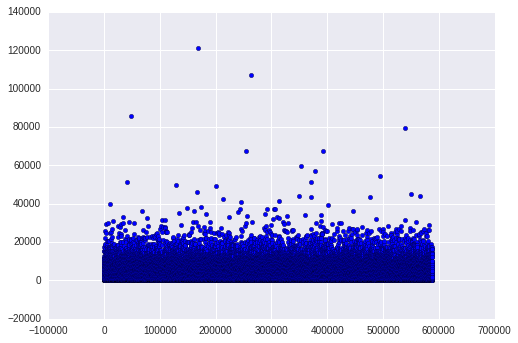

In [10]:
plt.scatter(train.id, train.loss);

In [11]:
strange_data = train.loc[train.loss > 4e4]

In [34]:
def summarize_dataset(df, features):
    
    for feat in features:
        print('Feature Name: %s\n'%(feat))
        if df[feat].dtype == np.object:
            feature_counts = df[feat].value_counts()
            print(df[feat].value_counts() / feature_counts.sum())
        else:
            print(df[feat].describe())
        print('='*50 + '\n')

In [35]:
features = train.columns[1:-1]

In [38]:
summarize_dataset(train.loc[train.loss <= 4e4] , features[:10])

Feature Name: cat1

A    0.751629
B    0.248371
Name: cat1, dtype: float64

Feature Name: cat2

A    0.566733
B    0.433267
Name: cat2, dtype: float64

Feature Name: cat3

A    0.945176
B    0.054824
Name: cat3, dtype: float64

Feature Name: cat4

A    0.681824
B    0.318176
Name: cat4, dtype: float64

Feature Name: cat5

A    0.657081
B    0.342919
Name: cat5, dtype: float64

Feature Name: cat6

A    0.699286
B    0.300714
Name: cat6, dtype: float64

Feature Name: cat7

A    0.97574
B    0.02426
Name: cat7, dtype: float64

Feature Name: cat8

A    0.941358
B    0.058642
Name: cat8, dtype: float64

Feature Name: cat9

A    0.600722
B    0.399278
Name: cat9, dtype: float64

Feature Name: cat10

A    0.850798
B    0.149202
Name: cat10, dtype: float64



In [37]:
summarize_dataset(strange_data, features[:10])

Feature Name: cat1

A    0.956522
B    0.043478
Name: cat1, dtype: float64

Feature Name: cat2

B    0.652174
A    0.347826
Name: cat2, dtype: float64

Feature Name: cat3

A    0.913043
B    0.086957
Name: cat3, dtype: float64

Feature Name: cat4

B    0.521739
A    0.478261
Name: cat4, dtype: float64

Feature Name: cat5

A    0.521739
B    0.478261
Name: cat5, dtype: float64

Feature Name: cat6

A    0.913043
B    0.086957
Name: cat6, dtype: float64

Feature Name: cat7

A    0.73913
B    0.26087
Name: cat7, dtype: float64

Feature Name: cat8

A    0.913043
B    0.086957
Name: cat8, dtype: float64

Feature Name: cat9

B    0.608696
A    0.391304
Name: cat9, dtype: float64

Feature Name: cat10

A    0.521739
B    0.478261
Name: cat10, dtype: float64



In [43]:
summarize_dataset(train.loc[train.loss <= 4e4] , features[10:20])

Feature Name: cat11

A    0.893125
B    0.106875
Name: cat11, dtype: float64

Feature Name: cat12

A    0.848732
B    0.151268
Name: cat12, dtype: float64

Feature Name: cat13

A    0.896652
B    0.103348
Name: cat13, dtype: float64

Feature Name: cat14

A    0.987913
B    0.012087
Name: cat14, dtype: float64

Feature Name: cat15

A    0.999819
B    0.000181
Name: cat15, dtype: float64

Feature Name: cat16

A    0.965623
B    0.034377
Name: cat16, dtype: float64

Feature Name: cat17

A    0.993048
B    0.006952
Name: cat17, dtype: float64

Feature Name: cat18

A    0.994758
B    0.005242
Name: cat18, dtype: float64

Feature Name: cat19

A    0.990398
B    0.009602
Name: cat19, dtype: float64

Feature Name: cat20

A    0.998917
B    0.001083
Name: cat20, dtype: float64



In [44]:
summarize_dataset(strange_data, features[10:20])

Feature Name: cat11

A    0.652174
B    0.347826
Name: cat11, dtype: float64

Feature Name: cat12

A    0.565217
B    0.434783
Name: cat12, dtype: float64

Feature Name: cat13

A    0.695652
B    0.304348
Name: cat13, dtype: float64

Feature Name: cat14

A    0.956522
B    0.043478
Name: cat14, dtype: float64

Feature Name: cat15

A    1.0
Name: cat15, dtype: float64

Feature Name: cat16

A    0.913043
B    0.086957
Name: cat16, dtype: float64

Feature Name: cat17

A    1.0
Name: cat17, dtype: float64

Feature Name: cat18

A    1.0
Name: cat18, dtype: float64

Feature Name: cat19

A    1.0
Name: cat19, dtype: float64

Feature Name: cat20

A    1.0
Name: cat20, dtype: float64



In [45]:
summarize_dataset(train.loc[train.loss <= 4e4] , features[20:30])

Feature Name: cat21

A    0.997807
B    0.002193
Name: cat21, dtype: float64

Feature Name: cat22

A    0.999772
B    0.000228
Name: cat22, dtype: float64

Feature Name: cat23

A    0.836082
B    0.163918
Name: cat23, dtype: float64

Feature Name: cat24

A    0.966329
B    0.033671
Name: cat24, dtype: float64

Feature Name: cat25

A    0.902578
B    0.097422
Name: cat25, dtype: float64

Feature Name: cat26

A    0.94054
B    0.05946
Name: cat26, dtype: float64

Feature Name: cat27

A    0.893428
B    0.106572
Name: cat27, dtype: float64

Feature Name: cat28

A    0.960827
B    0.039173
Name: cat28, dtype: float64

Feature Name: cat29

A    0.980217
B    0.019783
Name: cat29, dtype: float64

Feature Name: cat30

A    0.981104
B    0.018896
Name: cat30, dtype: float64



In [46]:
summarize_dataset(strange_data, features[20:30])

Feature Name: cat21

A    1.0
Name: cat21, dtype: float64

Feature Name: cat22

A    1.0
Name: cat22, dtype: float64

Feature Name: cat23

A    0.652174
B    0.347826
Name: cat23, dtype: float64

Feature Name: cat24

A    0.956522
B    0.043478
Name: cat24, dtype: float64

Feature Name: cat25

A    0.782609
B    0.217391
Name: cat25, dtype: float64

Feature Name: cat26

A    0.869565
B    0.130435
Name: cat26, dtype: float64

Feature Name: cat27

A    0.956522
B    0.043478
Name: cat27, dtype: float64

Feature Name: cat28

A    0.826087
B    0.173913
Name: cat28, dtype: float64

Feature Name: cat29

A    1.0
Name: cat29, dtype: float64

Feature Name: cat30

A    1.0
Name: cat30, dtype: float64



In [47]:
summarize_dataset(train.loc[train.loss <= 4e4] , features[30:40])

Feature Name: cat31

A    0.971661
B    0.028339
Name: cat31, dtype: float64

Feature Name: cat32

A    0.993569
B    0.006431
Name: cat32, dtype: float64

Feature Name: cat33

A    0.994923
B    0.005077
Name: cat33, dtype: float64

Feature Name: cat34

A    0.996898
B    0.003102
Name: cat34, dtype: float64

Feature Name: cat35

A    0.998869
B    0.001131
Name: cat35, dtype: float64

Feature Name: cat36

A    0.830075
B    0.169925
Name: cat36, dtype: float64

Feature Name: cat37

A    0.88005
B    0.11995
Name: cat37, dtype: float64

Feature Name: cat38

A    0.899148
B    0.100852
Name: cat38, dtype: float64

Feature Name: cat39

A    0.97385
B    0.02615
Name: cat39, dtype: float64

Feature Name: cat40

A    0.956478
B    0.043522
Name: cat40, dtype: float64



In [48]:
summarize_dataset(strange_data, features[30:40])

Feature Name: cat31

A    0.913043
B    0.086957
Name: cat31, dtype: float64

Feature Name: cat32

A    1.0
Name: cat32, dtype: float64

Feature Name: cat33

A    0.956522
B    0.043478
Name: cat33, dtype: float64

Feature Name: cat34

A    1.0
Name: cat34, dtype: float64

Feature Name: cat35

A    1.0
Name: cat35, dtype: float64

Feature Name: cat36

A    0.608696
B    0.391304
Name: cat36, dtype: float64

Feature Name: cat37

A    0.869565
B    0.130435
Name: cat37, dtype: float64

Feature Name: cat38

A    0.782609
B    0.217391
Name: cat38, dtype: float64

Feature Name: cat39

A    0.956522
B    0.043478
Name: cat39, dtype: float64

Feature Name: cat40

A    0.826087
B    0.173913
Name: cat40, dtype: float64



In [49]:
summarize_dataset(train.loc[train.loss <= 4e4] , features[40:50])

Feature Name: cat41

A    0.962086
B    0.037914
Name: cat41, dtype: float64

Feature Name: cat42

A    0.990998
B    0.009002
Name: cat42, dtype: float64

Feature Name: cat43

A    0.977657
B    0.022343
Name: cat43, dtype: float64

Feature Name: cat44

A    0.917162
B    0.082838
Name: cat44, dtype: float64

Feature Name: cat45

A    0.977025
B    0.022975
Name: cat45, dtype: float64

Feature Name: cat46

A    0.995316
B    0.004684
Name: cat46, dtype: float64

Feature Name: cat47

A    0.996277
B    0.003723
Name: cat47, dtype: float64

Feature Name: cat48

A    0.998571
B    0.001429
Name: cat48, dtype: float64

Feature Name: cat49

A    0.951188
B    0.048812
Name: cat49, dtype: float64

Feature Name: cat50

A    0.730715
B    0.269285
Name: cat50, dtype: float64



In [51]:
summarize_dataset(strange_data, features[40:50])

Feature Name: cat41

A    0.913043
B    0.086957
Name: cat41, dtype: float64

Feature Name: cat42

A    1.0
Name: cat42, dtype: float64

Feature Name: cat43

A    0.956522
B    0.043478
Name: cat43, dtype: float64

Feature Name: cat44

A    0.826087
B    0.173913
Name: cat44, dtype: float64

Feature Name: cat45

A    0.956522
B    0.043478
Name: cat45, dtype: float64

Feature Name: cat46

A    1.0
Name: cat46, dtype: float64

Feature Name: cat47

A    1.0
Name: cat47, dtype: float64

Feature Name: cat48

A    1.0
Name: cat48, dtype: float64

Feature Name: cat49

A    1.0
Name: cat49, dtype: float64

Feature Name: cat50

A    0.913043
B    0.086957
Name: cat50, dtype: float64



In [52]:
summarize_dataset(train.loc[train.loss <= 4e4] , features[50:60])

Feature Name: cat51

A    0.993377
B    0.006623
Name: cat51, dtype: float64

Feature Name: cat52

A    0.953196
B    0.046804
Name: cat52, dtype: float64

Feature Name: cat53

A    0.918378
B    0.081622
Name: cat53, dtype: float64

Feature Name: cat54

A    0.975809
B    0.024191
Name: cat54, dtype: float64

Feature Name: cat55

A    0.99923
B    0.00077
Name: cat55, dtype: float64

Feature Name: cat56

A    0.999033
B    0.000967
Name: cat56, dtype: float64

Feature Name: cat57

A    0.983983
B    0.016017
Name: cat57, dtype: float64

Feature Name: cat58

A    0.998731
B    0.001269
Name: cat58, dtype: float64

Feature Name: cat59

A    0.998407
B    0.001593
Name: cat59, dtype: float64

Feature Name: cat60

A    0.997631
B    0.002369
Name: cat60, dtype: float64



In [53]:
summarize_dataset(strange_data, features[50:60])

Feature Name: cat51

A    1.0
Name: cat51, dtype: float64

Feature Name: cat52

A    1.0
Name: cat52, dtype: float64

Feature Name: cat53

A    1.0
Name: cat53, dtype: float64

Feature Name: cat54

A    0.956522
B    0.043478
Name: cat54, dtype: float64

Feature Name: cat55

A    1.0
Name: cat55, dtype: float64

Feature Name: cat56

A    1.0
Name: cat56, dtype: float64

Feature Name: cat57

A    0.73913
B    0.26087
Name: cat57, dtype: float64

Feature Name: cat58

A    1.0
Name: cat58, dtype: float64

Feature Name: cat59

A    1.0
Name: cat59, dtype: float64

Feature Name: cat60

A    1.0
Name: cat60, dtype: float64



In [54]:
summarize_dataset(train.loc[train.loss <= 4e4] , features[60:70])

Feature Name: cat61

A    0.996166
B    0.003834
Name: cat61, dtype: float64

Feature Name: cat62

A    0.999761
B    0.000239
Name: cat62, dtype: float64

Feature Name: cat63

A    0.99958
B    0.00042
Name: cat63, dtype: float64

Feature Name: cat64

A    0.99975
B    0.00025
Name: cat64, dtype: float64

Feature Name: cat65

A    0.987987
B    0.012013
Name: cat65, dtype: float64

Feature Name: cat66

A    0.95574
B    0.04426
Name: cat66, dtype: float64

Feature Name: cat67

A    0.996325
B    0.003675
Name: cat67, dtype: float64

Feature Name: cat68

A    0.999246
B    0.000754
Name: cat68, dtype: float64

Feature Name: cat69

A    0.99837
B    0.00163
Name: cat69, dtype: float64

Feature Name: cat70

A    0.999878
B    0.000122
Name: cat70, dtype: float64



In [55]:
summarize_dataset(strange_data, features[60:70])

Feature Name: cat61

A    1.0
Name: cat61, dtype: float64

Feature Name: cat62

A    1.0
Name: cat62, dtype: float64

Feature Name: cat63

A    1.0
Name: cat63, dtype: float64

Feature Name: cat64

A    1.0
Name: cat64, dtype: float64

Feature Name: cat65

A    1.0
Name: cat65, dtype: float64

Feature Name: cat66

A    0.913043
B    0.086957
Name: cat66, dtype: float64

Feature Name: cat67

A    1.0
Name: cat67, dtype: float64

Feature Name: cat68

A    1.0
Name: cat68, dtype: float64

Feature Name: cat69

A    1.0
Name: cat69, dtype: float64

Feature Name: cat70

A    1.0
Name: cat70, dtype: float64



In [56]:
summarize_dataset(train.loc[train.loss <= 4e4] , features[70:80])

Feature Name: cat71

A    0.948676
B    0.051324
Name: cat71, dtype: float64

Feature Name: cat72

A    0.628328
B    0.371672
Name: cat72, dtype: float64

Feature Name: cat73

A    0.819209
B    0.180653
C    0.000138
Name: cat73, dtype: float64

Feature Name: cat74

A    0.980950
B    0.018912
C    0.000138
Name: cat74, dtype: float64

Feature Name: cat75

A    0.819374
B    0.180621
C    0.000005
Name: cat75, dtype: float64

Feature Name: cat76

A    0.962989
B    0.032826
C    0.004185
Name: cat76, dtype: float64

Feature Name: cat77

D    0.995672
C    0.002167
B    0.001901
A    0.000260
Name: cat77, dtype: float64

Feature Name: cat78

B    0.990483
A    0.004185
C    0.003425
D    0.001907
Name: cat78, dtype: float64

Feature Name: cat79

B    0.812167
D    0.141464
A    0.037516
C    0.008853
Name: cat79, dtype: float64

Feature Name: cat80

D    0.730253
B    0.247049
C    0.018540
A    0.004158
Name: cat80, dtype: float64



In [57]:
summarize_dataset(strange_data, features[70:80])

Feature Name: cat71

A    0.652174
B    0.347826
Name: cat71, dtype: float64

Feature Name: cat72

B    0.521739
A    0.478261
Name: cat72, dtype: float64

Feature Name: cat73

A    0.956522
B    0.043478
Name: cat73, dtype: float64

Feature Name: cat74

A    1.0
Name: cat74, dtype: float64

Feature Name: cat75

A    1.0
Name: cat75, dtype: float64

Feature Name: cat76

A    0.913043
B    0.086957
Name: cat76, dtype: float64

Feature Name: cat77

D    1.0
Name: cat77, dtype: float64

Feature Name: cat78

B    1.0
Name: cat78, dtype: float64

Feature Name: cat79

D    0.869565
B    0.086957
C    0.043478
Name: cat79, dtype: float64

Feature Name: cat80

B    0.869565
D    0.086957
C    0.043478
Name: cat80, dtype: float64



In [58]:
summarize_dataset(train.loc[train.loss <= 4e4] , features[80:90])

Feature Name: cat81

D    0.819836
B    0.128134
C    0.047845
A    0.004185
Name: cat81, dtype: float64

Feature Name: cat82

B    0.783436
A    0.102594
D    0.099870
C    0.014100
Name: cat82, dtype: float64

Feature Name: cat83

B    0.751571
A    0.138262
D    0.083847
C    0.026320
Name: cat83, dtype: float64

Feature Name: cat84

C    0.822757
A    0.156388
D    0.018572
B    0.002284
Name: cat84, dtype: float64

Feature Name: cat85

B    0.987721
C    0.005369
A    0.004185
D    0.002724
Name: cat85, dtype: float64

Feature Name: cat86

B    0.551486
D    0.385464
C    0.054648
A    0.008402
Name: cat86, dtype: float64

Feature Name: cat87

B    0.886811
D    0.062206
C    0.046799
A    0.004185
Name: cat87, dtype: float64

Feature Name: cat88

A    0.897013
D    0.102509
E    0.000441
B    0.000037
Name: cat88, dtype: float64

Feature Name: cat89

A    0.975740
B    0.022868
C    0.001168
D    0.000175
E    0.000027
I    0.000011
H    0.000005
G    0.000005
Name: cat89, dtype:

In [59]:
summarize_dataset(strange_data, features[80:90])

Feature Name: cat81

D    0.608696
B    0.217391
C    0.173913
Name: cat81, dtype: float64

Feature Name: cat82

B    0.826087
A    0.173913
Name: cat82, dtype: float64

Feature Name: cat83

B    0.739130
A    0.173913
C    0.086957
Name: cat83, dtype: float64

Feature Name: cat84

C    0.782609
A    0.130435
B    0.043478
D    0.043478
Name: cat84, dtype: float64

Feature Name: cat85

B    0.956522
D    0.043478
Name: cat85, dtype: float64

Feature Name: cat86

B    0.434783
A    0.304348
D    0.260870
Name: cat86, dtype: float64

Feature Name: cat87

B    0.434783
C    0.304348
D    0.260870
Name: cat87, dtype: float64

Feature Name: cat88

A    1.0
Name: cat88, dtype: float64

Feature Name: cat89

A    0.73913
B    0.26087
Name: cat89, dtype: float64

Feature Name: cat90

A    0.913043
B    0.086957
Name: cat90, dtype: float64



In [60]:
summarize_dataset(train.loc[train.loss <= 4e4] , features[90:100])

Feature Name: cat91

A    0.589585
B    0.226347
G    0.141974
C    0.033989
D    0.006102
E    0.001349
F    0.000515
H    0.000138
Name: cat91, dtype: float64

Feature Name: cat92

A    0.662131
H    0.334002
B    0.003335
C    0.000329
I    0.000138
D    0.000058
F    0.000005
Name: cat92, dtype: float64

Feature Name: cat93

D    0.797785
C    0.190037
B    0.006017
E    0.003866
A    0.002294
Name: cat93, dtype: float64

Feature Name: cat94

D    0.645912
B    0.274606
C    0.072349
A    0.003919
F    0.002624
E    0.000483
G    0.000106
Name: cat94, dtype: float64

Feature Name: cat95

C    0.464781
D    0.422316
E    0.092498
A    0.019825
B    0.000579
Name: cat95, dtype: float64

Feature Name: cat96

E    0.925872
D    0.042072
B    0.015704
G    0.014153
F    0.001822
A    0.000186
C    0.000127
I    0.000064
Name: cat96, dtype: float64

Feature Name: cat97

C    0.414892
E    0.251998
A    0.222842
G    0.088887
D    0.020070
F    0.001131
B    0.000181
Name: cat97, dtype: f

In [61]:
summarize_dataset(strange_data, features[90:100])

Feature Name: cat91

A    0.521739
B    0.434783
G    0.043478
Name: cat91, dtype: float64

Feature Name: cat92

A    0.565217
H    0.434783
Name: cat92, dtype: float64

Feature Name: cat93

D    0.782609
C    0.217391
Name: cat93, dtype: float64

Feature Name: cat94

D    0.869565
B    0.130435
Name: cat94, dtype: float64

Feature Name: cat95

C    0.652174
D    0.217391
A    0.130435
Name: cat95, dtype: float64

Feature Name: cat96

E    1.0
Name: cat96, dtype: float64

Feature Name: cat97

A    0.434783
G    0.347826
C    0.217391
Name: cat97, dtype: float64

Feature Name: cat98

A    0.73913
D    0.26087
Name: cat98, dtype: float64

Feature Name: cat99

P    0.260870
T    0.260870
C    0.217391
D    0.130435
E    0.086957
F    0.043478
Name: cat99, dtype: float64

Feature Name: cat100

F    0.391304
G    0.217391
O    0.130435
H    0.086957
L    0.043478
N    0.043478
I    0.043478
M    0.043478
Name: cat100, dtype: float64



In [62]:
summarize_dataset(train.loc[train.loss <= 4e4] , features[100:110])

Feature Name: cat101

A    0.566733
D    0.091187
C    0.090119
G    0.058116
F    0.053841
J    0.038541
I    0.035529
M    0.019469
L    0.016851
Q    0.014653
O    0.013235
S    0.000919
R    0.000728
E    0.000037
B    0.000016
K    0.000011
U    0.000005
N    0.000005
H    0.000005
Name: cat101, dtype: float64

Feature Name: cat102

A    0.941358
B    0.027367
C    0.026177
E    0.002560
D    0.002385
G    0.000080
F    0.000064
J    0.000005
H    0.000005
Name: cat102, dtype: float64

Feature Name: cat103

A    0.657081
B    0.177063
C    0.087650
D    0.041440
E    0.023755
F    0.008110
G    0.002916
H    0.001009
I    0.000579
J    0.000239
L    0.000090
K    0.000058
N    0.000011
Name: cat103, dtype: float64

Feature Name: cat104

E    0.227967
G    0.215938
D    0.146637
F    0.102116
H    0.091277
K    0.075897
I    0.057946
C    0.036905
L    0.018482
J    0.016660
M    0.006134
O    0.002172
N    0.000807
P    0.000457
A    0.000361
B    0.000228
Q    0.000016
Name: cat1

In [63]:
summarize_dataset(strange_data, features[100:110])

Feature Name: cat101

A    0.347826
Q    0.130435
M    0.130435
J    0.086957
C    0.086957
G    0.043478
R    0.043478
O    0.043478
F    0.043478
D    0.043478
Name: cat101, dtype: float64

Feature Name: cat102

A    0.913043
B    0.086957
Name: cat102, dtype: float64

Feature Name: cat103

A    0.521739
C    0.173913
D    0.130435
B    0.086957
F    0.043478
G    0.043478
Name: cat103, dtype: float64

Feature Name: cat104

I    0.347826
K    0.260870
L    0.260870
N    0.043478
M    0.043478
J    0.043478
Name: cat104, dtype: float64

Feature Name: cat105

H    0.217391
J    0.130435
P    0.130435
G    0.086957
I    0.086957
K    0.086957
M    0.086957
F    0.086957
L    0.043478
T    0.043478
Name: cat105, dtype: float64

Feature Name: cat106

E    0.521739
D    0.173913
C    0.173913
F    0.130435
Name: cat106, dtype: float64

Feature Name: cat107

E    0.478261
D    0.217391
I    0.130435
J    0.086957
L    0.043478
C    0.043478
Name: cat107, dtype: float64

Feature Name: cat108

In [65]:
summarize_dataset(train.loc[train.loss <= 4e4] , features[110:116])

Feature Name: cat111

A    0.681824
C    0.172049
E    0.077952
G    0.037372
I    0.019002
K    0.007186
M    0.002507
O    0.001174
Q    0.000483
S    0.000202
U    0.000085
W    0.000085
B    0.000037
F    0.000016
D    0.000016
Y    0.000011
Name: cat111, dtype: float64

Feature Name: cat112

E     0.133530
AH    0.098978
AS    0.093831
J     0.086120
AF    0.049741
AN    0.048520
N     0.044892
U     0.044372
AV    0.037824
AK    0.035721
K     0.032178
AI    0.025221
S     0.022305
AP    0.021243
G     0.016825
F     0.016724
AW    0.016703
A     0.012804
AR    0.012560
C     0.011987
O     0.011594
D     0.008736
AD    0.008126
AY    0.007509
Y     0.007175
AG    0.007069
AT    0.006750
AA    0.006591
AM    0.006214
AL    0.006001
R     0.005964
AX    0.005704
I     0.004992
X     0.004913
AE    0.004429
Q     0.004206
V     0.003680
H     0.002910
AO    0.002836
T     0.002767
L     0.002618
W     0.002448
AC    0.002411
M     0.002331
AU    0.002305
B     0.002246
P     0.0021

In [66]:
summarize_dataset(strange_data, features[110:116])

Feature Name: cat111

A    0.478261
C    0.217391
E    0.173913
G    0.086957
M    0.043478
Name: cat111, dtype: float64

Feature Name: cat112

J     0.260870
E     0.217391
AF    0.086957
AH    0.086957
AN    0.086957
AT    0.043478
AD    0.043478
AS    0.043478
Q     0.043478
S     0.043478
U     0.043478
Name: cat112, dtype: float64

Feature Name: cat113

AT    0.304348
G     0.130435
U     0.130435
J     0.086957
BD    0.086957
H     0.086957
E     0.086957
BE    0.043478
AN    0.043478
Name: cat113, dtype: float64

Feature Name: cat114

A    0.913043
C    0.043478
J    0.043478
Name: cat114, dtype: float64

Feature Name: cat115

J    0.217391
L    0.086957
G    0.086957
I    0.086957
F    0.086957
H    0.086957
P    0.086957
E    0.086957
O    0.043478
K    0.043478
Q    0.043478
D    0.043478
Name: cat115, dtype: float64

Feature Name: cat116

LV    0.130435
KP    0.130435
KT    0.086957
MJ    0.086957
U     0.086957
MK    0.043478
R     0.043478
W     0.043478
LD    0.043478
KW 

** Observation: Frequency counts might play a role in identifying high losses vs average losses. **